In [25]:
from firedrake import *
from firedrake.petsc import PETSc
from slepc4py import SLEPc

In [26]:
mesh = UnitSquareMesh(10, 10)

In [27]:
V = FunctionSpace(mesh, "CG", 1)

In [28]:
u = TrialFunction(V)
v = TestFunction(V)

In [29]:
lhs = dot(grad(u), grad(v))*dx
rhs = u * v * dx

In [30]:
bc = DirichletBC(V, 0, [1, 2, 3, 4])

In [31]:
A = assemble(lhs, bcs=bc).M.handle

In [32]:
l = assemble(rhs).M.handle

In [33]:
num_eigenvalues = 1

In [34]:
es = SLEPc.EPS().create(comm=COMM_WORLD)
es.setDimensions(num_eigenvalues)
es.setOperators(A, l)
es.setFromOptions()
es.solve()

In [35]:
nconv = es.getConverged()

In [36]:
nconv

2

In [37]:
vr, vi = A.getVecs()

In [38]:
lam = es.getEigenpair(0, vr, vi)

In [39]:
eigenmodes_real, eigenmodes_imag = Function(V), Function(V)

In [40]:
eigenmodes_real.vector()[:], eigenmodes_imag.vector()[:] = vr, vi

In [42]:
%matplotlib inline

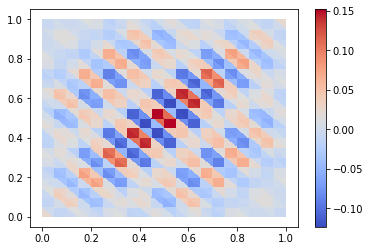

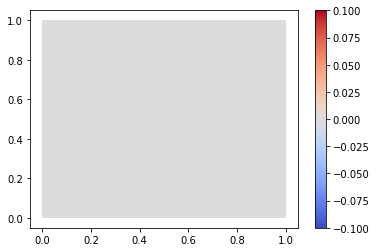

In [43]:
from matplotlib import pyplot
plot(eigenmodes_real)
plot(eigenmodes_imag)


In [44]:
lam

(2462.9081372427263+0j)